In [1]:
%matplotlib inline

# Tiny Oscillators

Words, words, words.

### Notes
- The point / position of this exploration is to show that 'sure, this is possible', but to take the position that it seems like a slightly weird idea, and seems unlikely (for example, in an Occam's Razor way). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Use NeuroDSP for time series simulations & analyses
from neurodsp.sim import sim_combined
from neurodsp.spectral import compute_spectrum_welch
from neurodsp.utils import create_times
from neurodsp.plts import plot_time_series, plot_power_spectra

from fooof import FOOOF
from fooof.plts import plot_spectrum

In [3]:
# Simulation settings
n_seconds = 5
s_rate = 1000

n_points = s_rate*n_seconds
times = create_times(n_points/s_rate, s_rate)

In [4]:
## General Settings
welch_settings = {'nperseg' : 1*s_rate,
                  'noverlap' : 0.5*s_rate}

In [5]:
# ...
fm = FOOOF(max_n_peaks=0, verbose=False)

Complex Signals of Multiple Oscillations
----------------------------------------

In principle, signals that display power across all frequencies need not arise from, or be
best described as, signals with rhythmic components.

Of course, it could be the case that such a signal does indeed arise from the summation across
many oscillations. Here we will explore that.




In [6]:
#tiny_oscs = {'sim_oscillation' : [{'freq' : freq} for freq in np.arange(0.1, 250, 0.1)]}
#tiny_oscs = {'sim_oscillation' : [{'freq' : freq} for freq in np.arange(1, 100, 1)]}
tiny_oscs = {'sim_oscillation' : [{'freq' : freq} for freq in np.arange(1, 30, 1)]}

In [7]:
print('This signal definition has {} oscillations in it. Wow!'.format(\
    len(tiny_oscs['sim_oscillation'])))
print('That seems like too many though. I bet brains don\'t do this...')

This signal definition has 29 oscillations in it. Wow!
That seems like too many though. I bet brains don't do this...


Balanced Tiny Oscillations
-------------------------------



In [8]:
tosc_sig = sim_combined(n_seconds, s_rate, tiny_oscs)

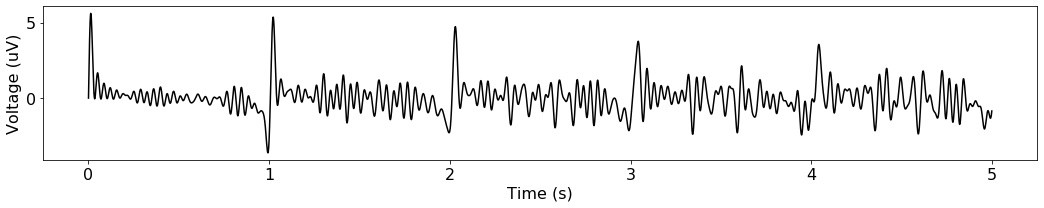

In [9]:
plot_time_series(times, tosc_sig)

In [10]:
freqs, powers = compute_spectrum_welch(tosc_sig, s_rate, **welch_settings)

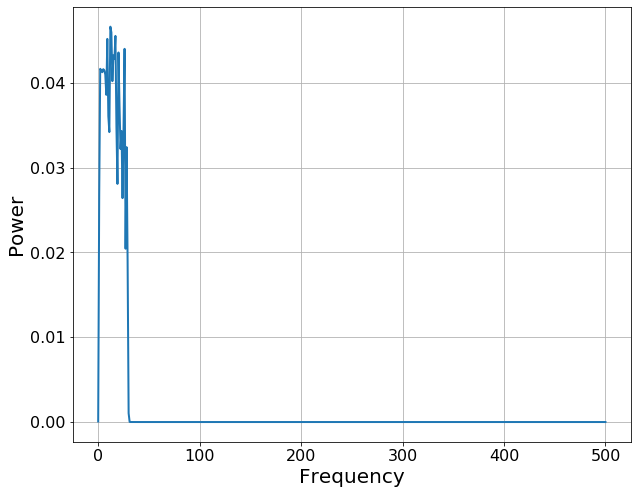

In [11]:
plot_spectrum(freqs, powers)
#plt.xlim([1, 25])

In [12]:
fm.fit(freqs, powers, [5, 25])
fm.get_params('aperiodic_params', 'exponent')
#fm.plot()

0.1520611756694057

#### Section Conclusion

A signal with a power spectrum that looks like white noise *can* be simulated
with a sum of many oscillations.

### Unbalanced Tiny Oscillations

Now let's explore multiple oscillator models with 1/f power spectra.

In [13]:
f_start, f_stop = 1, 55
log_freqs = np.logspace(np.log10(f_start), np.log10(f_stop))

In [14]:
tiny_oscs = {'sim_oscillation' : [{'freq' : freq} for freq in log_freqs]}

In [15]:
# Set up proportions
#proportions = list(np.linspace(0.0, 1.0, num=len(tiny_oscs['sim_oscillation'])))
proportions = list(np.logspace(0., 1., num=len(tiny_oscs['sim_oscillation']), base=10))
proportions.reverse()

In [17]:
utosc_sig = sim_combined(n_seconds, s_rate, tiny_oscs, component_variances=proportions)

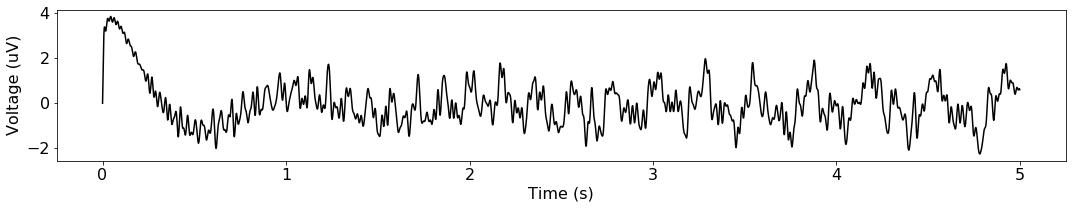

In [18]:
plot_time_series(times, utosc_sig)

In [19]:
freqs, powers = compute_spectrum_welch(utosc_sig, s_rate, **welch_settings)

(2, 25)

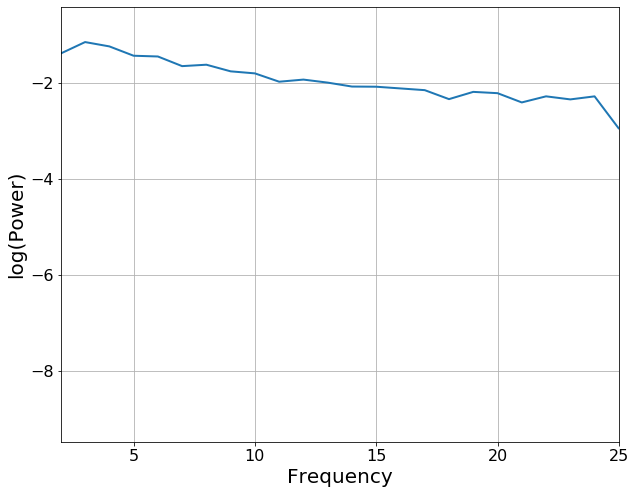

In [20]:
plot_spectrum(freqs, powers, log_powers=True)
plt.xlim([2, 25])

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 5 - 30 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -0.3861, 1.4475                                          
                                                                                                  
                                       0 peaks were found:                                        
          

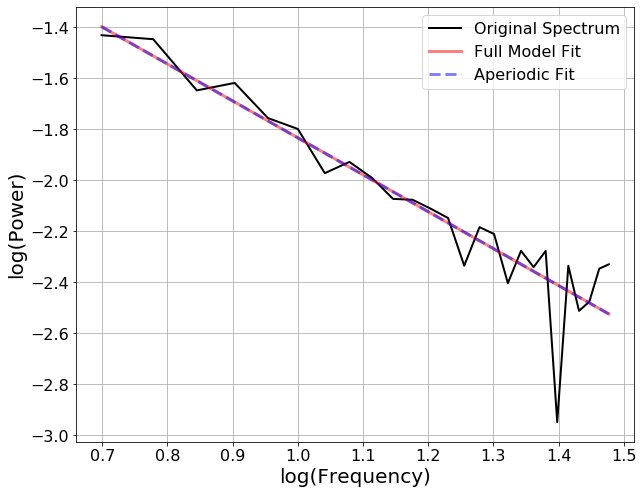

In [21]:
fm.report(freqs, powers, [5, 30], plt_log=True)

#### Section Conclusions

A signal comprised of multiple simulated oscillations, with coordinated power,
can also approximate power spectra that mimic colored noise.

However, note that this model poses a lot of coordinated entities.

This simulation has _n_frequencies_ oscillators, with a coordinated pattern of
relative power across all frequencies.




#### MISC

In [ ]:
sim.sim_oscillation?

In [ ]:
sig1 = sim.sim_oscillation(n_seconds, s_rate, 5, variance=100.0)
sig2 = sim.sim_oscillation(n_seconds, s_rate, 15, variance=10.)
sig3 = sim.sim_oscillation(n_seconds, s_rate, 25, variance=1)

In [ ]:
plot_time_series(times, [sig1, sig2, sig3])

In [ ]:
tot_sig = sig1 + sig2 + sig3

In [ ]:
plot_time_series(times, tot_sig)

In [ ]:
freqs, powers = spectral.compute_spectrum(tot_sig, s_rate)

In [ ]:
plot_spectrum(freqs, powers, log_freqs=False, log_powers=True)
plt.xlim([1, 30])